# **File Input & Output**
For program to retain data between the times it is run, you must save the data
- Data is saved to a file, typically on computer disk
- Saved data can be retrieved and used at a later time

“***Writing data to***”: saving data on a file
<br>***Output file***: a file that data is written to
<br>*“**Reading data from**”*: process of retrieving data from a file
<br>***Input file***: a file from which data is read

Three steps when a program uses a file
- Open the file
- Process the file
- Close the file

**Types of files**
<br>
- A **text file** is a sequence of characters
- A **binary file** (for images, videos and more) is a sequence of bytes
- First character in a text file or byte in a binary file is located at position 0
  - In a file of n characters or bytes, the highest position number is n – 1 (**end-of-file marker**)
- For each file you **open**, Python creates a **file object** that you’ll use to interact with the file


**Comma-separated values (CSV) file**
- CSV files are the most common format used for importing and exporting data from spreadsheets and databases.
- CSV files are text files that have delimiters. A delimiter is a character that separates data values.



# Text File

## File `open` Function

`file_variable = open(filename, mode)`

**Mode**: string specifying how the file will be opened

Example: reading only ('r'), writing ('w'), and appending ('a')


https://www.w3schools.com/python/python_file_handling.asp

In [ ]:
#open a file named customers.txt
file = open("customer.txt",'w')

### Writing Text File

In [ ]:
### Create a text file named accounts.txt for writing ###

#open file in write mode
file = open("customer.txt",'w')

#write three customers names into the file
file.write('David Jones\n')
file.write('Jones Bush\n')

#writes the items of a list to the file
file.writelines("Sarah James\nPeter Brogg")

#close the file
file.close()



### Reading Text File

In [ ]:
### Reading data from a text file - customers.txt ###

#open file in read modef
fileR =open("customer.txt",'r')

#print the records read from the file
#print(fileR.readline()) #read one line
#print(fileR.read()) # read all lines in the file

#print each line iteratively
for row in fileR: #reads each line in the file
  print(row)  #print the line read which is stored in 'row'

#close file
fileR.close()


David Jones

Jones Bush

Sarah James

Peter Brogg


### Writing & Reading with the `with` statement

- Acquires a resource and assigns its corresponding object to a variable
- Allows the application to use the resource via that variable
- Calls the resource object’s close method to release the resource

Advantage of using a `with` statement with a file open is that when the `with` statement code block ends, the file closes.

At the end of the with statement’s suite, the `with` statement *implicitly* calls the file object’s `close` method to close the file

**Records**
* 100 Jones 24.98 
* 200 Doe 345.67 
* 300 Williams 0.00 
* 400 Stone -42.16 
* 500 Rich 224.62

In [ ]:
### Write and reading from file using 'with' statement ###

# Open file for writing and write records
with open("accounts.txt", 'w') as accounts:
  accounts.write('100 Jones 24.98\n')
  accounts.write('200 Doe 345.67\n')
  accounts.write('300 Williams 0.00\n')
  accounts.write('400 Stone -42.16\n')
  accounts.write('500 Rich 224.62\n')
    

In [ ]:
### Reading from file ###
with open("accounts.txt", 'r') as accounts:
  print(f'{"AccountID":10} {"Name":10} {"Balance":10}')
  for record in accounts:
    account, name, balance = record.split()
    print(f'{account:10} {name:10} {balance:10}')

    

AccountID  Name       Balance   
100        Jones      24.98     
200        Doe        345.67    
300        Williams   0.00      
400        Stone      -42.16    
500        Rich       224.62    


# Module CSV

## Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values. 

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format. 

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases. 

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values. 

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



Python **CSV module** provides functions for working with CSV files

In [ ]:
### Writing to a CSV file ###

#import csv module
import csv

#open file and write records
with open("accounts.csv", 'w') as acc:
  writer = csv.writer(acc) #Return a writer object responsible for converting the user’s data into delimited strings on the given file-like object
  writer.writerow(['AccountID', 'Name', 'Balance'])
  writer.writerow([100,'Jones',24.98])
  writer.writerow([200, 'Doe', 345.67])
  writer.writerow([300, 'Williams', 0.00])
  writer.writerow([400, 'Stone', -42.16])
  writer.writerow([500, 'Rich', 224.62])



In [ ]:
### Reading from CSV file ###
'''The csv module’s reader function returns an object that reads 
CSV-format data from the specified file object
'''

#open file and read records
with open("accounts.csv", 'r') as acc:
  reader = csv.reader(acc) #returns an iterator object e.g.: list of items
  for record in reader: #each line is read and stored as list
    accID, name, bal = record 
    print(f'{accID:10} {name:10} {bal:10}')


AccountID  Name       Balance   
100        Jones      24.98     
200        Doe        345.67    
300        Williams   0.0       
400        Stone      -42.16    
500        Rich       224.62    


## Getting data from financial website

In [ ]:
#!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1653004800&period2=1661040000&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1630300930&period2=1661836930&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17582    0 17582    0     0  95554      0 --:--:-- --:--:-- --:--:-- 95554


In [ ]:
import csv

# open file and read records
with open("NABData.csv", 'r') as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader))
  print(next(reader))



['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2021-08-30', '27.700001', '27.700001', '27.360001', '27.540001', '26.303846', '3533723']
['2021-08-31', '27.490000', '27.750000', '27.440001', '27.730000', '26.485317', '7925320']
['2021-09-01', '27.750000', '28.340000', '27.620001', '28.340000', '27.067938', '8519345']


['2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07', '2021

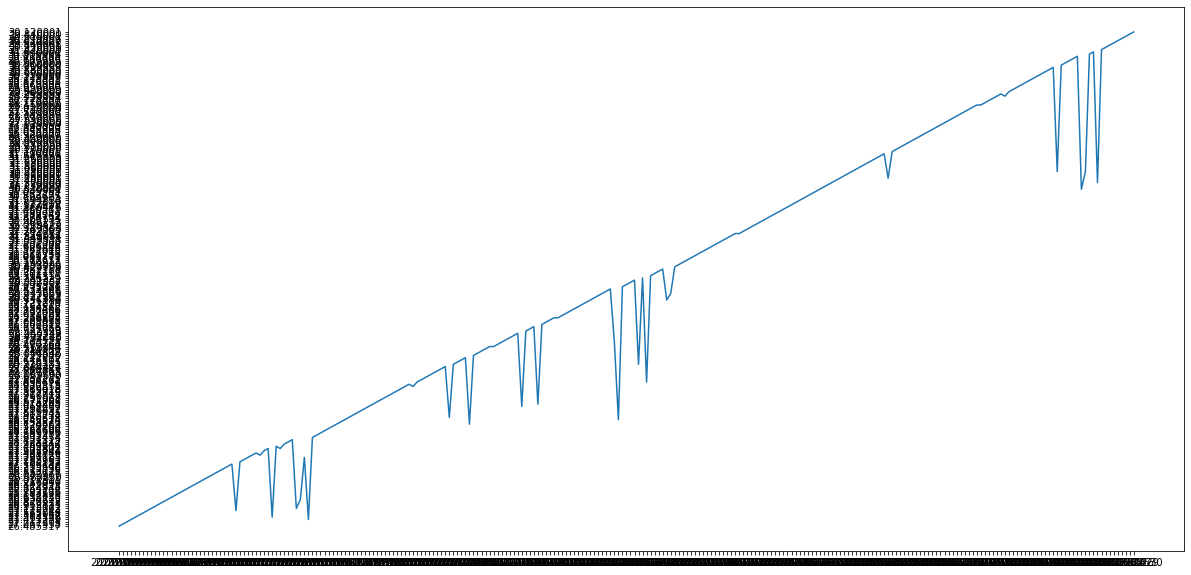

In [ ]:
import csv

date = []
close = []

# open file and read records
with open('NABData.csv', 'r') as data:
  reader = csv.reader(data)
  header = next(reader)
  row1 = next(reader)

  #print(type(row1))
  #print((row1))
  #print((row1[0]))
  #print((row1[5]))

  for record in reader:
    date.append(record[0])
    close.append(record[5])

print(date)
print(close)

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(date, close)


# Module Pandas

## Using Pandas Module to Read in CSV Files (the “Easy Way”)

An easier method of importing files into Python is using the **Pandas** module. Pandas (name derived from “panel data”) is a data analysis library that, among other things, makes reading in CSV files and accessing the contained data much easier 

The primary data structure used in Pandas are a ***DataFrame***. A DataFrame has a *two-dimensional tabular format using rows and columns*. Using a DataFrame, we can reference columns by name, rather than having to count to figure out which column number we want. Pandas provides an assortment of methods like .mean() that will do summary statistics on our data

 
Read From a CSV File Using Pandas

Source: *Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

In [ ]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1630300930&period2=1661836930&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17689    0 17689    0     0   104k      0 --:--:-- --:--:-- --:--:--  104k


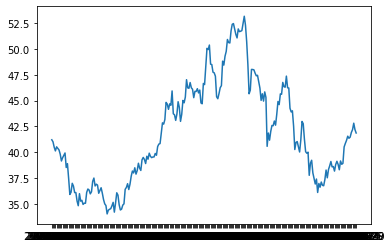

In [ ]:
#import pandas module
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_csv("BHPData.csv")
#print(data.info())
#print(data.describe())

plt.plot(data['Date'], data['Adj Close'])



## Daily Return of Stock Data

### Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  Now paste to the URL assignment statement.

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2021-08-30,45.630001,46.119999,45.549999,45.830002,41.203655,6923450,NaN
1,2021-08-31,46.160000,46.200001,45.500000,45.610001,41.005863,10296248,-0.004800
2,2021-09-01,45.180000,45.320000,44.775002,45.029999,40.484409,7927285,-0.012717
3,2021-09-02,41.980000,42.174999,41.709999,41.939999,40.125889,11433040,-0.008856
4,2021-09-03,42.060001,42.689999,42.049999,42.349998,40.518154,9025028,0.009776
...,...,...,...,...,...,...,...,...
249,2022-08-24,42.299999,42.480000,41.764999,41.910000,41.910000,10025360,0.010854
250,2022-08-25,41.910000,42.540001,41.799999,42.189999,42.189999,9439263,0.006681
251,2022-08-26,42.730000,43.070000,42.570000,42.810001,42.810001,8497552,0.014695
252,2022-08-29,42.430000,42.680000,41.910000,42.189999,42.189999,11010307,-0.014483


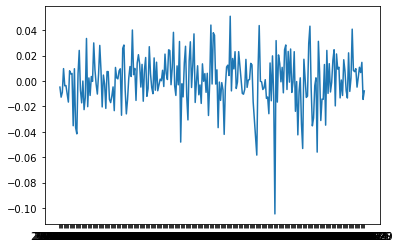

In [ ]:
#import pandas module
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_csv("BHPData.csv")
#print(data.info())
#print(data.describe())

data['Daily Return'] = data['Adj Close'] / data['Adj Close'].shift(1)-1


plt.plot(data['Date'], data['Daily Return'])

data

Sources:

* Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications

* Tony Gaddis, Starting out with Python, 5th Edition

* Deitel & Deitel, Intro to Python for Computer Science and Data Science, Global Edition
